In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mpl.__version__

'3.3.2'

In [15]:
mpl.style.use(['ggplot'])

In [4]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
df_canada = pd.read_excel(
    "https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true",
    sheet_name="Canada by Citizenship",
    skiprows=range(20),
    skipfooter=2
)

In [8]:
haiti = df_canada.loc[
    df_canada["OdName"] == "Haiti", year
].transpose()
haiti.head()

,75
1980,1666
1981,3692
1982,3498
1983,2860
1984,1418


In [63]:
year = list(range(1980, 2014))
year80s = list(range(1980, 1990))
year90s = list(range(1980, 1990))

<AxesSubplot:>

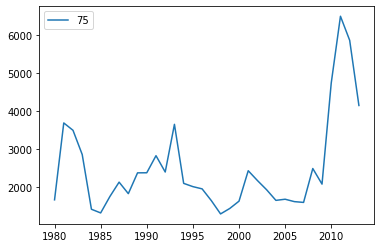

In [18]:
haiti.plot()

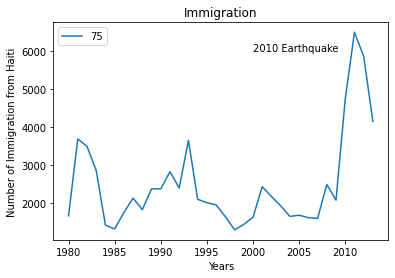

In [20]:
haiti.plot(kind='line')
plt.ylabel("Number of Immigration from Haiti")
plt.xlabel("Years")
plt.title("Immigration")

plt.text(2000, 6000, "2010 Earthquake")

plt.show()

In [23]:
df_cina_india = df_canada.loc[
    df_canada["OdName"].isin([
        "China",
        "India"
    ])
].transpose()

In [24]:
df_cina_india.head()

,36,79
Type,Immigrants,Immigrants
Coverage,Foreigners,Foreigners
OdName,China,India
AREA,935,935
AreaName,Asia,Asia


In [26]:
df_cina_india.rename(
    columns={
        36: "China",
        79: "India"
    },
    inplace=True
)

In [30]:
df_cina_india.plot(kind='line')
plt.ylabel("Number of Immigration china and india")
plt.xlabel("Years")
plt.title("Number of Immigration")

plt.show()

TypeError: no numeric data to plot

In [31]:
df_canada_total = df_canada.sum(axis=1)

In [32]:
df_canada["Total"] = df_canada_total

In [58]:
df_canada.rename(
    columns={
        "OdName": "Country",
        "AreaName": "Continent",
        "RegName": "Region"
    },
    inplace=True
)

top5_countries = df_canada.sort_values(
    by="Total",
    ascending=False,
    axis=0
).head()

In [65]:
top5_countries
top5_countries = top5_countries.set_index("Country")
top5_countries = top5_countries[year].transpose()

KeyError: "None of ['Country'] are in the columns"

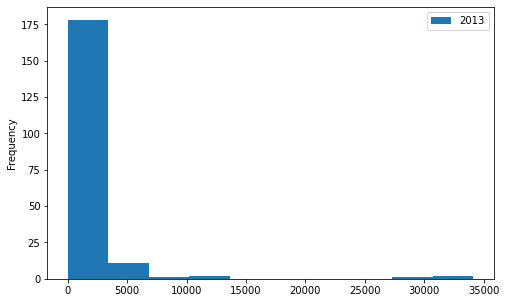

In [61]:
df_canada_country = df_canada.set_index("Country")
df_canada[
    [
        "Country", 2013
    ]
].plot(kind="hist", figsize=(8,5))
plt.show()

<AxesSubplot:ylabel='Frequency'>

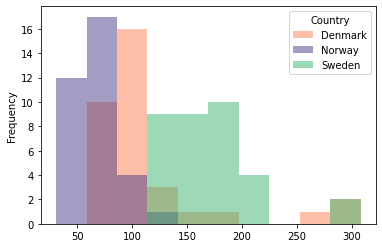

In [66]:
df_canada_country.loc[
    [
        "Denmark",
        "Norway",
        "Sweden"
    ], year
].transpose().plot(
    kind="hist",
    alpha=.5,
    color=[
        "coral",
        "darkslateblue",
        "mediumseagreen"
    ]
)

In [69]:
df_iceland = df_canada_country.loc["Iceland", year].head()
df_iceland

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

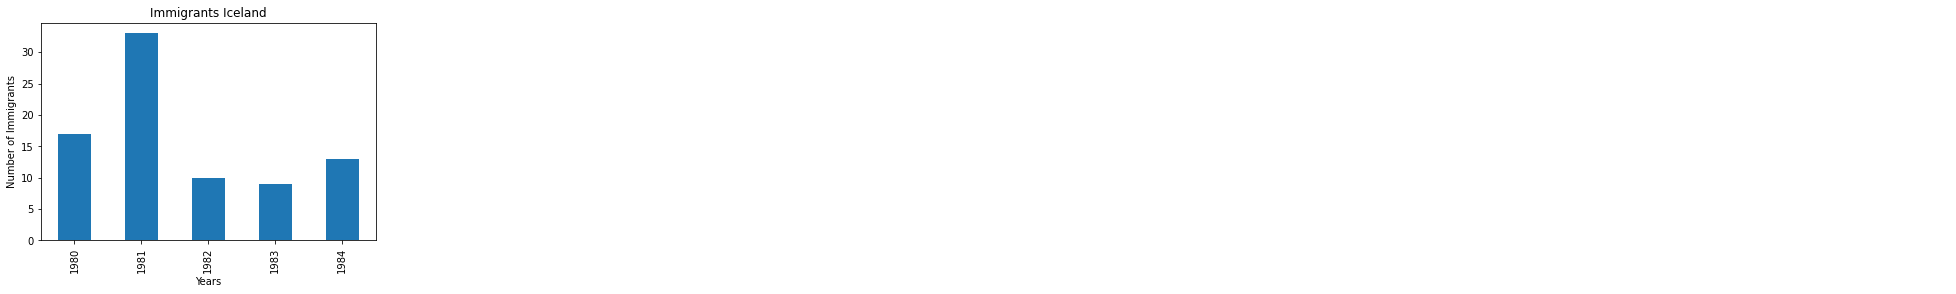

In [78]:
df_iceland.plot(
    kind="bar"
)
plt.title("Immigrants Iceland")
plt.xlabel("Years")
plt.ylabel("Number of Immigrants")

plt.annotate(
    "",
    xy=(5,15),
    xytext=(28, 20),
    xycoords="data",
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc3",
        color="green",
        lw=2
    )
)

plt.show()

In [89]:
top15_countries = df_canada.sort_values(
    by="Total",
    ascending=False,
    axis=0
).head(5)
top15_countries = top15_countries.set_index("Total")
top15_countries = top15_countries[year].transpose()

Total,699242,662705,554233,514148,248938
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


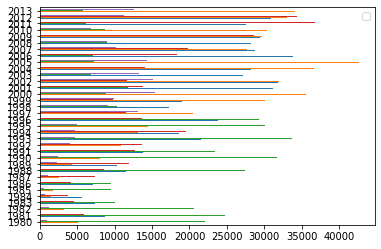

In [90]:
top15_countries.plot(
    kind="barh"
)
plt.legend("")
plt.show()

In [91]:
df_continent = df_canada.groupby(
    "Continent",
    axis=0,
).sum()

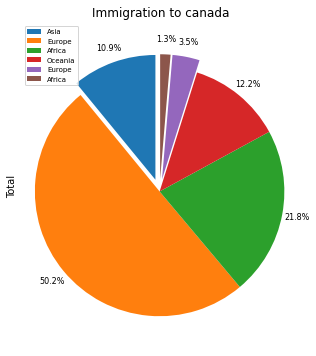

In [105]:
df_continent_pie = df_continent["Total"].plot(
    kind="pie",
    figsize=(5, 6),
    autopct="%1.1f%%",
    startangle=90,
    labels=None,
    fontsize=8,
    pctdistance=1.12,
    explode=[
        .1,
        0,
        0,
        0,
        .1,
        .1
    ]
)
plt.title("Immigration to canada")
plt.axis("equal")
plt.legend(
    labels=df_canada["Continent"].values.tolist(),
    loc="upper left",
    fontsize="x-small"
)
plt.show()

In [114]:
df_japan = df_canada_country.loc['Japan', year].transpose()

<AxesSubplot:>

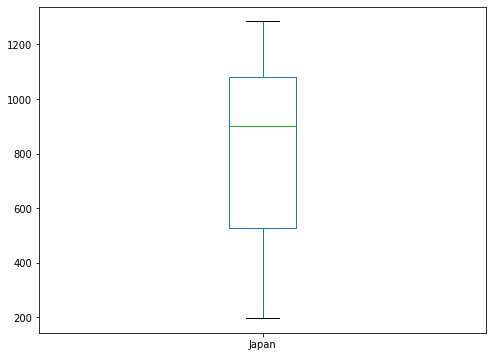

In [115]:
df_japan.plot(
    kind="box",
    figsize=(8,6)
)

In [120]:
df_cina_india.describe()

,China,India
count,43,43
unique,43,43
top,31961,India
freq,1,1


In [121]:
df_cina_india.plot(
    kind="box"
)

TypeError: no numeric data to plot

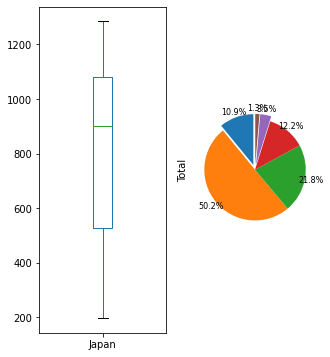

In [135]:
figur = plt.figure()

ax1 = figur.add_subplot(1, 2, 1)
ax2 = figur.add_subplot(1, 2, 2)

df_japan.plot(
    kind="box",
    figsize=(8,6),
    ax=ax1
)

df_continent["Total"].plot(
    kind="pie",
    figsize=(5, 6),
    autopct="%1.1f%%",
    startangle=90,
    labels=None,
    fontsize=8,
    pctdistance=1.12,
    explode=[
        .1,
        0,
        0,
        0,
        .1,
        .1
    ],
    ax=ax2
)
plt.savefig("image/figure.png")
plt.show()